Titanic Survival Prediction

In [153]:
# Dataset from Kaggle

import pandas as pd

train = pd.read_csv('train.csv')
# train contains features and survival label

test = pd.read_csv('test.csv')
# test contains features only, no survival label

print(train.shape)

(891, 21)


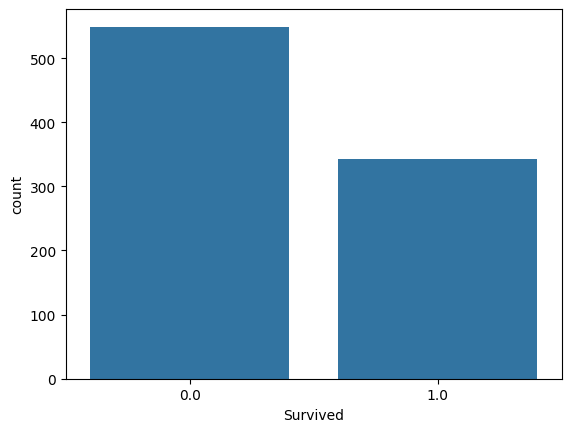

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
WikiId           2
Name_wiki        2
Age_wiki         4
Hometown         2
Boarded          2
Destination      2
Lifeboat       546
Body           804
Class            2
dtype: int64


In [154]:
# checking distributions, missing values, and correlation

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Survived', data=train)
plt.show()

print(train.isnull().sum())

Age, cabin, Embarked etc has missing values

while Survival mainly depends Sex and Pclass

In [155]:
# Fill missing values (Mean, Median, Mode)

train['Age'].fillna(train['Age'].mean(), inplace=True)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

train['Age'].fillna(train['Age'].mean(), inplace=True)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

# Drop irrelevant columns (PassengerId, Name, Ticket, Cabin)
train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Age_wiki'], axis=1, inplace=True)
test.drop(['Name', 'Ticket', 'Cabin', 'Age_wiki'], axis=1, inplace=True)

/tmp/ipython-input-2445659946.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].mean(), inplace=True)
/tmp/ipython-input-2445659946.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [156]:
# Encode Categorical variables

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train['Sex'] = le.fit_transform(train['Sex'])
train['Embarked'] = le.fit_transform(train['Embarked'])

test['Sex'] = le.fit_transform(test['Sex'])
test['Embarked'] = le.fit_transform(test['Embarked'])

In [157]:
# Creating new feature familySize (Survival often depends on family groups)

train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

# Creating IsAlone

train['IsAlone'] = 0
train.loc[train['FamilySize'] == 1, 'IsAlone'] = 1

test['IsAlone'] = 0
test.loc[test['FamilySize'] == 1, 'IsAlone'] = 1

In [158]:
# Age Binning - Instead of raw age  transforms into categories (child, adult, senior)

train['AgeBand'] = pd.cut(train['Age'], 5)
train['AgeBand'] = le.fit_transform(train['AgeBand'])

test['AgeBand'] = pd.cut(test['Age'], 5)
test['AgeBand'] = le.fit_transform(test['AgeBand'])

In [159]:
# Fare Binning - fares had social class implications

train['FareBand'] = pd.cut(train['Fare'], 4)
train['FareBand'] = le.fit_transform(train['FareBand'])

test['FareBand'] = pd.cut(test['Fare'], 4)
test['FareBand'] = le.fit_transform(test['FareBand'])

In [160]:
# Split Data into train and validation

from sklearn.model_selection import train_test_split

# Drop additional non-numeric columns
X = train.drop(['Survived', 'WikiId', 'Name_wiki', 'Hometown', 'Boarded', 'Destination', 'Lifeboat', 'Body', 'Class'], axis=1)
y = train['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=23)

print(X_train.isnull().sum())
print(X_val.isnull().sum())

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
FamilySize    0
IsAlone       0
AgeBand       0
FareBand      0
dtype: int64
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
FamilySize    0
IsAlone       0
AgeBand       0
FareBand      0
dtype: int64


In [161]:
# Train Model (using Logistic Regression)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(max_iter=200) # Increased max_iter to prevent convergence warning
lr.fit(X_train, y_train)
y_pred = lr.predict(X_val)
print("Logistic Regression Accuracy: ", accuracy_score(y_val, y_pred))

Logistic Regression Accuracy:  0.7653631284916201


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [162]:
# Train Model (using RandomForestClassifier)

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=23)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)
print("Random Forest Accuracy: ", accuracy_score(y_val, y_pred))

Random Forest Accuracy:  0.770949720670391


In [163]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,WikiId,Name_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class,FamilySize,IsAlone,AgeBand,FareBand
0,892,3,1,34.5,0,0,7.8292,1,928.0,"Kelly, Mr. James","Unknown, Ireland",Southampton,New York City,NaN,70MB,3.0,1,1,2,0
1,893,3,0,47.0,1,0,7.0000,2,1297.0,"Wilkes, Mrs. Ellen","Penzance, Cornwall, England",Southampton,"Akron, Ohio, US",16,NaN,3.0,2,0,3,0
2,894,2,1,62.0,0,0,9.6875,1,518.0,"Myles, Mr. Thomas Francis","Fermoy, Ireland[note 1]",Queenstown,"Waban, Massachusetts, US",NaN,NaN,2.0,1,1,4,0
3,895,3,1,27.0,0,0,8.6625,2,1303.0,"Wirz, Mr. Albert","Uster, Switzerland",Southampton,"Beloit, Wisconsin, US",NaN,131MB,3.0,1,1,1,0
4,896,3,0,22.0,1,1,12.2875,2,871.0,"Hirvonen, Mrs. Helga Elisabeth (née Lindqvist)","Taalintehdas, Finland",Southampton,"Monessen, Pennsylvania, US",15,NaN,3.0,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,1,NaN,0,0,8.0500,2,1227.0,"Spector, Mr. Woolf","London, England",Southampton,New York City,NaN,NaN,3.0,1,1,5,0
414,1306,1,0,39.0,0,0,108.9000,0,229.0,"and maid, Doña Fermina Oliva y Ocana","Madrid, Spain",Cherbourg,"New York, New York, US",8,NaN,1.0,1,1,2,0
415,1307,3,1,38.5,0,0,7.2500,2,1169.0,"Sæther, Mr. Simon Sivertsen","Skaun, Sør-Trøndelag, Norway",Southampton,US,NaN,32MB,3.0,1,1,2,0
416,1308,3,1,NaN,0,0,8.0500,2,1289.0,"Ware, Mr. Frederick William","Greenwich, London, England",Southampton,New York City,NaN,NaN,3.0,1,1,5,0


In [169]:
Model = RandomForestClassifier(n_estimators=200, random_state=23)
Model.fit(X, y)

test_preds = Model.predict(test.drop(['PassengerId','WikiId', 'Name_wiki', 'Hometown', 'Boarded', 'Destination', 'Lifeboat', 'Body', 'Class'], axis=1))

out = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': test_preds})
out.to_csv('submission.csv', index=False)
out

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,1.0
4,896,0.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0
